# Project: Wrangling and Analyze Data

In [1]:
#import libraries to be used

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import requests
import json
import warnings
warnings.filterwarnings("ignore")

## Data Gathering
we will proceed to gather **all** three pieces of data for this project and load them in the notebook.

1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
#Load dataset
twitter_archive_raw = pd.read_csv('twitter-archive-enhanced.csv')
twitter_archive_raw.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
#Define function to download data
def download(url, filename):
    r=requests.get(url)
    
    with open(filename, mode='wb') as file:
        file.write(r.content)

In [4]:
#call function to download data
download('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv', 'image-predictions.tsv')

In [5]:
#load Data
image_predict_raw = pd.read_csv('image-predictions.tsv', sep='\t')
image_predict_raw.head(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


3. download additional data via the Request Library (tweet_json.txt)

In [6]:
#Call function to download data
download('https://video.udacity-data.com/topher/2018/November/5be5fb7d_tweet-json/tweet-json.txt', 'tweet-json.txt')

In [7]:
tweets = []
for tweet in open('tweet-json.txt', 'r'):
    tweets.append(json.loads(tweet))

In [8]:
#load Data
tweets_raw = pd.DataFrame().from_dict(tweets).set_index('created_at')

tweets_raw.head(2)

,contributors,coordinates,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,id,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
created_at,,,,,,,,,,,,,,,,,,,,,
Tue Aug 01 16:23:56 +0000 2017,None,None,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",39467,False,This is Phineas. He's a mystical boy. Only eve...,None,892420643555336193,...,False,NaN,NaN,NaN,8853,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
Tue Aug 01 00:17:27 +0000 2017,None,None,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",33819,False,This is Tilly. She's just checking pup on you....,None,892177421306343426,...,False,NaN,NaN,NaN,6514,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


## Assessing Data
In this section, we will assess the loaded data in other to detect any quality and tidiness issue using both visual and programmatic means.


##### Visual Assessment for Twitter Archive Data

In [9]:
#check the first few rows of the data
twitter_archive_raw.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


##### Programmatic assessment for Twitter Archive Data

In [10]:
#Check the information about data
twitter_archive_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [11]:
#Check Summry statisitc of rating_denominator and rating numerator
twitter_archive_raw[['rating_numerator', 'rating_denominator']].describe() 

,rating_numerator,rating_denominator
count,2356.000000,2356.000000
mean,13.126486,10.455433
std,45.876648,6.745237
min,0.000000,0.000000
25%,10.000000,10.000000
50%,11.000000,10.000000
75%,12.000000,10.000000
max,1776.000000,170.000000


In [12]:
twitter_archive_raw['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [13]:
twitter_archive_raw['rating_denominator'].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [14]:
twitter_archive_raw[['doggo','floofer', 'pupper', 'puppo']].sample(10)

,doggo,floofer,pupper,puppo
1291,None,None,None,None
2193,None,None,None,None
1884,None,None,None,None
2045,None,None,None,None
2133,None,None,None,None
795,None,None,None,None
1727,None,None,None,None
95,None,None,None,None
115,None,None,None,None
597,None,None,None,None


In [15]:
twitter_archive_raw ['name'].value_counts().sample(10)

Sierra         2
Shnuggles      1
Gerbald        1
Keurig         2
Klevin         3
Alfie          5
Mister         2
Baxter         2
Batdog         1
Shakespeare    1
Name: name, dtype: int64

##### Visual Assessment for Image Prediction Data

In [16]:
image_predict_raw.head(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [17]:
image_predict_raw.duplicated().sum()

0

##### Programmatic assessment for Image Prediction Data

In [18]:
image_predict_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [19]:
image_predict_raw[['p1_conf', 'p2_conf', 'p3_conf']].describe()

,p1_conf,p2_conf,p3_conf
count,2075.000000,2.075000e+03,2.075000e+03
mean,0.594548,1.345886e-01,6.032417e-02
std,0.271174,1.006657e-01,5.090593e-02
min,0.044333,1.011300e-08,1.740170e-10
25%,0.364412,5.388625e-02,1.622240e-02
50%,0.588230,1.181810e-01,4.944380e-02
75%,0.843855,1.955655e-01,9.180755e-02
max,1.000000,4.880140e-01,2.734190e-01


##### Visual Assessment for Tweets Data

In [20]:
tweets_raw.head(5)

,contributors,coordinates,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,id,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
created_at,,,,,,,,,,,,,,,,,,,,,
Tue Aug 01 16:23:56 +0000 2017,None,None,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",39467,False,This is Phineas. He's a mystical boy. Only eve...,None,892420643555336193,...,False,NaN,NaN,NaN,8853,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
Tue Aug 01 00:17:27 +0000 2017,None,None,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",33819,False,This is Tilly. She's just checking pup on you....,None,892177421306343426,...,False,NaN,NaN,NaN,6514,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
Mon Jul 31 00:18:03 +0000 2017,None,None,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",25461,False,This is Archie. He is a rare Norwegian Pouncin...,None,891815181378084864,...,False,NaN,NaN,NaN,4328,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
Sun Jul 30 15:58:51 +0000 2017,None,None,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",42908,False,This is Darla. She commenced a snooze mid meal...,None,891689557279858688,...,False,NaN,NaN,NaN,8964,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
Sat Jul 29 16:00:24 +0000 2017,None,None,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",41048,False,This is Franklin. He would like you to stop ca...,None,891327558926688256,...,False,NaN,NaN,NaN,9774,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [21]:
tweets_raw.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2354 entries, Tue Aug 01 16:23:56 +0000 2017 to Sun Nov 15 22:32:08 +0000 2015
Data columns (total 30 columns):
contributors                     0 non-null object
coordinates                      0 non-null object
display_text_range               2354 non-null object
entities                         2354 non-null object
extended_entities                2073 non-null object
favorite_count                   2354 non-null int64
favorited                        2354 non-null bool
full_text                        2354 non-null object
geo                              0 non-null object
id                               2354 non-null int64
id_str                           2354 non-null object
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null object
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 non-null object


### Quality issues
##### The following are some of the Quality issues assesed in our 3 loaded dataframes which will be addressed;

1.Rating_denominator column in the twitter_archive_raw table have values that are less than 10 and greater than 10

2.Timestamp column in `twitter_archive_raw` table should be a datetime value.

3.Some  values in the name column of `twitter_archive_raw` table are in lowercase.

4.Missing values in ‘name’ and dog stages of twitter_archive_raw` table represented as ‘None’

5.Tweets beyond August 1st, 2017 in `tweets_raw` are not needed.

6.Only original tweets needed in the `tweets_raw table`(retweets and replies not needed)

7.id_str column in `tweets_raw` table needs to be renamed tweet_id to allow for merging with other tables

8.tweet_id columns in twitter_archive_raw and image_pred_raw table should be formatted to string data types

9.Some Columns in the twitter_archive_raw, tweets_raw, are not relevant. also columns with much missing values.

### Tidiness issues
##### The following are the tidiness issues that will be addressed;
1. Data in three seperate Tables.

2. Dog stage in twitter Archive data in four seperate columns

## Cleaning Data
In this section,  we will proceed to clean **all** of the quality and tidiness issues that have been documented above while assessing. 


In [22]:
# Make copies of original pieces of data
twitter_archive_clean = twitter_archive_raw.copy()
image_predict_clean = image_predict_raw.copy()
tweets_clean = tweets_raw.copy()

### Issue #1: Rating_denominator column in the `twitter_archive_raw` table have values that are less than 10 and greater than 10

#### Define:
We need to have a uniform  rating denominator of 10 to for all the ratings. we will filter out rating denominators that are 10

#### Code 

In [23]:
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean['rating_denominator'] == 10]

#### Test

In [24]:
twitter_archive_clean['rating_denominator'].unique()

array([10])

### Issue #2: Timestamp column in `twitter_archive_raw` table should be a datetime value.

#### Define:
we will use the pd.to_datetime() to change the timestamp column from object to datetime

#### Code 

In [25]:
twitter_archive_clean['timestamp'] = pd.to_datetime(twitter_archive_clean.timestamp, utc=False, infer_datetime_format=True)

#### Test

In [26]:
twitter_archive_clean[['timestamp']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2333 entries, 0 to 2355
Data columns (total 1 columns):
timestamp    2333 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 36.5 KB


### Issue #3: Some  values in the name column of `twitter_archive_raw` table are in lowercase

#### Define
format all the name values to titlecase

#### Code

In [27]:
twitter_archive_clean['name']= twitter_archive_clean['name'].str.title()

#### Test

In [28]:
twitter_archive_clean['name'].str.islower().sum()

0

### Issue #4: Dog stage in twitter Archive data in four seperate columns and Missing Values represented as None

#### Define
Replace None values with empty string and format them to nan values. Merge the four dog stages into one column

#### Code

In [29]:
# Replace 'None' values in doggo, floofer, pupper and puppo columns with empty string
twitter_archive_clean['doggo'].replace('None', '', inplace=True)
twitter_archive_clean['floofer'].replace('None', '', inplace=True)
twitter_archive_clean['pupper'].replace('None', '', inplace=True)
twitter_archive_clean['puppo'].replace('None', '', inplace=True)


In [30]:
# merge the four dog stages into one column
twitter_archive_clean['dog_stage'] = twitter_archive_clean['doggo'] + twitter_archive_clean['floofer'] + twitter_archive_clean['pupper'] + twitter_archive_clean['puppo']

In [31]:
# account for multiple dog stages
twitter_archive_clean.loc[twitter_archive_clean['dog_stage'] == 'doggopupper', 'dog_stage'] = 'others'
twitter_archive_clean.loc[twitter_archive_clean['dog_stage'] == 'doggopuppo', 'dog_stage'] = 'others'
twitter_archive_clean.loc[twitter_archive_clean['dog_stage'] == 'doggofloofer', 'dog_stage'] = 'others'


In [32]:
# format empty string  to missing values
twitter_archive_clean.loc[twitter_archive_clean['dog_stage'] == '', 'dog_stage'] = np.nan

#### Test

In [33]:
twitter_archive_clean['dog_stage'].unique()

array([nan, 'doggo', 'puppo', 'pupper', 'floofer', 'others'], dtype=object)

### Issue #5: Tweets beyond August 1st, 2017 in `tweets_raw` are not needed.

#### Define 
extract tweets before August 1st, 2017

#### Code

In [34]:
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean['timestamp'] < pd.Timestamp(2017,8,2)]

#### Test


In [35]:
twitter_archive_clean['timestamp'].describe()

count                    2333
unique                   2333
top       2016-09-12 15:10:21
freq                        1
first     2015-11-15 22:32:08
last      2017-08-01 16:23:56
Name: timestamp, dtype: object

### Issue #6: Only original tweets needed in the `tweets_raw table`(retweets and replies not needed)

#### Define
filter out original tweets

#### Code

In [36]:
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.retweeted_status_id.isnull()]
tweets_clean = tweets_clean[tweets_clean.quoted_status_id.isnull()]

#### Test

In [37]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2153 entries, 0 to 2355
Data columns (total 18 columns):
tweet_id                      2153 non-null int64
in_reply_to_status_id         73 non-null float64
in_reply_to_user_id           73 non-null float64
timestamp                     2153 non-null datetime64[ns]
source                        2153 non-null object
text                          2153 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2099 non-null object
rating_numerator              2153 non-null int64
rating_denominator            2153 non-null int64
name                          2153 non-null object
doggo                         2153 non-null object
floofer                       2153 non-null object
pupper                        2153 non-null object
puppo                         2153 non-null object
dog_stage                     

In [38]:
tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2325 entries, Tue Aug 01 16:23:56 +0000 2017 to Sun Nov 15 22:32:08 +0000 2015
Data columns (total 30 columns):
contributors                     0 non-null object
coordinates                      0 non-null object
display_text_range               2325 non-null object
entities                         2325 non-null object
extended_entities                2073 non-null object
favorite_count                   2325 non-null int64
favorited                        2325 non-null bool
full_text                        2325 non-null object
geo                              0 non-null object
id                               2325 non-null int64
id_str                           2325 non-null object
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null object
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 non-null object


### Issue #7: id_str column in `tweets_raw` table needs to be renamed tweet_id

#### Define
Rename id_str to tweet_id to allow for merging with other tables

#### Code

In [39]:
tweets_clean.rename(index=str, columns={"id_str": "tweet_id"}, inplace=True)

#### Test

In [40]:
tweets_clean.columns

Index(['contributors', 'coordinates', 'display_text_range', 'entities',
       'extended_entities', 'favorite_count', 'favorited', 'full_text', 'geo',
       'id', 'tweet_id', 'in_reply_to_screen_name', 'in_reply_to_status_id',
       'in_reply_to_status_id_str', 'in_reply_to_user_id',
       'in_reply_to_user_id_str', 'is_quote_status', 'lang', 'place',
       'possibly_sensitive', 'possibly_sensitive_appealable', 'quoted_status',
       'quoted_status_id', 'quoted_status_id_str', 'retweet_count',
       'retweeted', 'retweeted_status', 'source', 'truncated', 'user'],
      dtype='object')

### Issue #8: tweet_id columns in twitter_archive, image_pred, table should be formatted to string data types

#### Define
convert tweet_id columns into string data type using .astype()

#### Code

In [41]:
# Convert tweet_id to str from twitter_archive and image_predict table.

twitter_archive_clean['tweet_id'] = twitter_archive_clean['tweet_id'].astype(str)
image_predict_clean['tweet_id'] = image_predict_clean['tweet_id'].astype(str)


#### Test

In [42]:
print(twitter_archive_clean['tweet_id'].dtype)
print(image_predict_clean['tweet_id'].dtype)

object
object


### Issue #9: Data in three seperate Tables.

#### Define
Merge the three tables together to get one master dataframe using the pandas merge method

#### Code

In [43]:
#merge twitter_archive_clean and tweets_clean as archive_tweets_merged
archive_tweets_merged= twitter_archive_clean.merge(tweets_clean, on=['tweet_id','in_reply_to_status_id','in_reply_to_user_id','source'],how='inner')
archive_tweets_merged.shape

(2125, 44)

In [44]:
#merge archive_tweets_merged and imgae_predict_clean as master_df
master_df=archive_tweets_merged.merge(image_predict_clean,how="inner",on="tweet_id")
master_df.shape

(1976, 55)

In [45]:
master_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


#### Test

In [59]:
print(master_df.columns)
print(master_df.shape)

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'dog_stage', 'contributors', 'coordinates', 'display_text_range',
       'entities', 'extended_entities', 'favorite_count', 'favorited',
       'full_text', 'geo', 'id', 'in_reply_to_screen_name',
       'in_reply_to_status_id_str', 'in_reply_to_user_id_str',
       'is_quote_status', 'lang', 'place', 'possibly_sensitive',
       'possibly_sensitive_appealable', 'quoted_status', 'quoted_status_id',
       'quoted_status_id_str', 'retweet_count', 'retweeted',
       'retweeted_status', 'truncated', 'user', 'jpg_url', 'img_num', 'p1',
       'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf',
       'p3_dog'],
      dtype='object')
(1976, 55)


### Issue #10: Some Columns in the twitter_archive_raw, tweets_raw, are not relevant. also columns with much missing values.

#### Define
Extract columns that are relevant

#### Code

In [47]:
#Get columns that are relevant
master_cols = ['tweet_id',
               'timestamp',
               'text',
               'rating_numerator',
               'rating_denominator', 
               'name',
               'dog_stage',
               'p1',
               'p1_dog',
               'favorite_count']


master = master_df[master_cols]

In [48]:
master.dropna(inplace=True)

#### Test

In [49]:
master.shape

(306, 10)

In [50]:
master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 306 entries, 9 to 1645
Data columns (total 10 columns):
tweet_id              306 non-null object
timestamp             306 non-null datetime64[ns]
text                  306 non-null object
rating_numerator      306 non-null int64
rating_denominator    306 non-null int64
name                  306 non-null object
dog_stage             306 non-null object
p1                    306 non-null object
p1_dog                306 non-null bool
favorite_count        306 non-null int64
dtypes: bool(1), datetime64[ns](1), int64(3), object(5)
memory usage: 24.2+ KB


In [51]:
master.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stage,p1,p1_dog,favorite_count
9,890240255349198849,2017-07-26 15:59:51,This is Cassie. She is a college pup. Studying...,14,10,Cassie,doggo,Pembroke,True,32467
12,889665388333682689,2017-07-25 01:55:32,Here's a puppo that seems to be on the fence a...,13,10,None,puppo,Pembroke,True,38818
14,889531135344209921,2017-07-24 17:02:04,This is Stuart. He's sporting his favorite fan...,13,10,Stuart,puppo,golden_retriever,True,15359
28,886366144734445568,2017-07-15 23:25:31,This is Roscoe. Another pupper fallen victim t...,12,10,Roscoe,pupper,French_bulldog,True,21524
37,884162670584377345,2017-07-09 21:29:42,Meet Yogi. He doesn't have any important dog m...,12,10,Yogi,doggo,German_shepherd,True,20771


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [52]:
#save file
master.to_csv('twitter_archive_master.csv', index=False)
df = pd.read_csv('twitter_archive_master.csv')

In [53]:
df.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stage,p1,p1_dog,favorite_count
0,890240255349198849,2017-07-26 15:59:51,This is Cassie. She is a college pup. Studying...,14,10,Cassie,doggo,Pembroke,True,32467
1,889665388333682689,2017-07-25 01:55:32,Here's a puppo that seems to be on the fence a...,13,10,None,puppo,Pembroke,True,38818
2,889531135344209921,2017-07-24 17:02:04,This is Stuart. He's sporting his favorite fan...,13,10,Stuart,puppo,golden_retriever,True,15359
3,886366144734445568,2017-07-15 23:25:31,This is Roscoe. Another pupper fallen victim t...,12,10,Roscoe,pupper,French_bulldog,True,21524
4,884162670584377345,2017-07-09 21:29:42,Meet Yogi. He doesn't have any important dog m...,12,10,Yogi,doggo,German_shepherd,True,20771


## Analyzing and Visualizing Data

### Insights:
1. Standard_poodle are the most liked breed.

2. Pupper is the most liked among the stages of Dog.

3. pupper is the most common among the various stages of Dog.

### Visualization

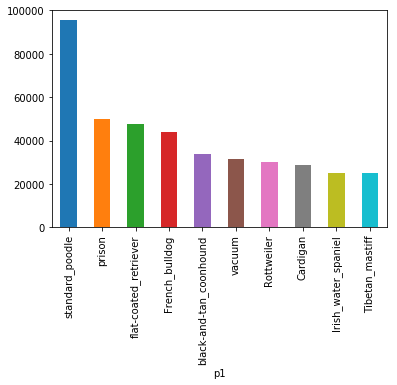

In [54]:
df.groupby('p1')['favorite_count'].mean().sort_values(ascending=False).head(10).plot(kind='bar');

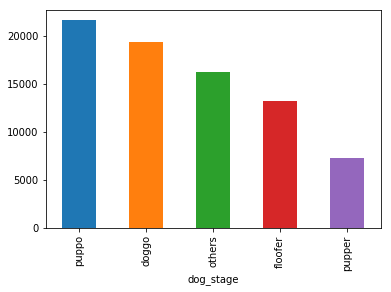

In [55]:
df.groupby('dog_stage')['favorite_count'].mean().sort_values(ascending=False).head(10).plot(kind='bar');

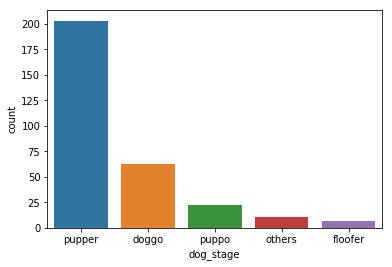

In [57]:
sns.countplot(df['dog_stage'], order = df['dog_stage'].value_counts().index);